In [17]:
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

diabetes=load_diabetes()

In [18]:
# 데이터 가져오기
df_x, df_y = diabetes.data, diabetes.target

In [19]:
# df_x 값들 numpy array로 변환해서 저장

X = np.array(df_x)
y = np.array(df_y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [62]:
# 모델 함수 구현
def model(x, w, b):
  return x.dot(w) + b

# 손실 함수 구현 MSE
def mse(a, b):
  return ((a-b)**2).mean()

# loss 구현
def loss(x, w, b, y):
  predictions = model(x, w, b)
  L = mse(predictions, y)
  return L

# gradient 함수 구현
def gradient(x, w, b, y):
  N = x.shape[0]
  predictions = model(x, w, b)
  dw = 1/N * 2 * x.T.dot(predictions - y)
  db = 2 * (predictions - y).mean()
  return dw, db

In [74]:
# 입력 데이터 개수에 맞는 가중치 W와 b
w = np.random.rand(X.shape[1])
b = np.random.randn()

# 하이퍼 파라미터 학습률 설정
lr = 1e-2
epochs = 27000

for epoch in range(epochs):
  dw, db = gradient(X_train, w, b, y_train)
  w -= lr * dw
  b -= lr * db

  l = loss(X_train, w, b, y_train)
  if epoch % 1000 == 0:
    print('epoch %d loss %0.4f' % (epoch, l))

# 테스트 데이터 성능 확인
print(loss(X_test, w, b, y_test))

epoch 0 loss 28559.3179
epoch 1000 loss 5342.6108
epoch 2000 loss 4823.6560
epoch 3000 loss 4441.1951
epoch 4000 loss 4155.6222
epoch 5000 loss 3939.2284
epoch 6000 loss 3772.5859
epoch 7000 loss 3642.0354
epoch 8000 loss 3537.9398
epoch 9000 loss 3453.4704
epoch 10000 loss 3383.7623
epoch 11000 loss 3325.3265
epoch 12000 loss 3275.6410
epoch 13000 loss 3232.8650
epoch 14000 loss 3195.6401
epoch 15000 loss 3162.9505
epoch 16000 loss 3134.0260
epoch 17000 loss 3108.2734
epoch 18000 loss 3085.2278
epoch 19000 loss 3064.5192
epoch 20000 loss 3045.8479
epoch 21000 loss 3028.9672
epoch 22000 loss 3013.6711
epoch 23000 loss 2999.7850
epoch 24000 loss 2987.1595
epoch 25000 loss 2975.6652
epoch 26000 loss 2965.1890
3043.9088177251874


In [75]:
# 테스트 데이터 성능 확인
print(loss(X_test, w, b, y_test))

3043.9088177251874


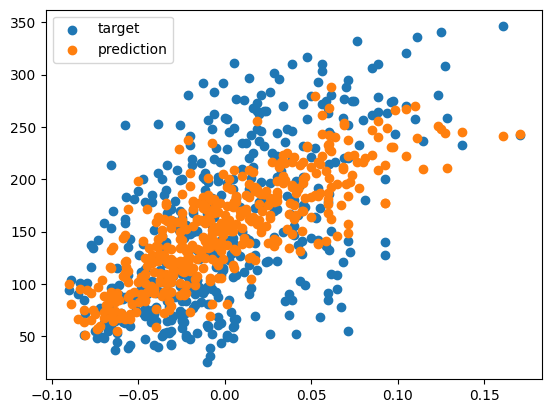

In [76]:
# x축에는 X 데이터의 첫 번째 컬럼 y축에는 정답인 target 데이터 예측한 데이터 시각화
plt.scatter(X[:, 2], y)
plt.scatter(X[:, 2], model(X, w, b))
plt.legend(['target', 'prediction'])
plt.show()

In [77]:
# %cd /content/drive/MyDrive/대학/활동/아이펠/lms

/content/drive/MyDrive/대학/활동/아이펠/lms


In [78]:
# ls

sampleSubmission.csv  test.csv  train.csv  프로젝트_기초다지기_rs8


In [79]:
# csv 불러오기
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [80]:
print(train.head())

              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


In [81]:
print(test.head())

              datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014  


In [82]:
# train 데이터 변수들 속성 확인
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [83]:
# datetime 칼럼 datetime 자료형으로 변환
train['datetime'] = pd.to_datetime(train['datetime'])
test['datetime'] = pd.to_datetime(test['datetime'])

In [84]:
# train 데이터의 datetime을 나눠 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second

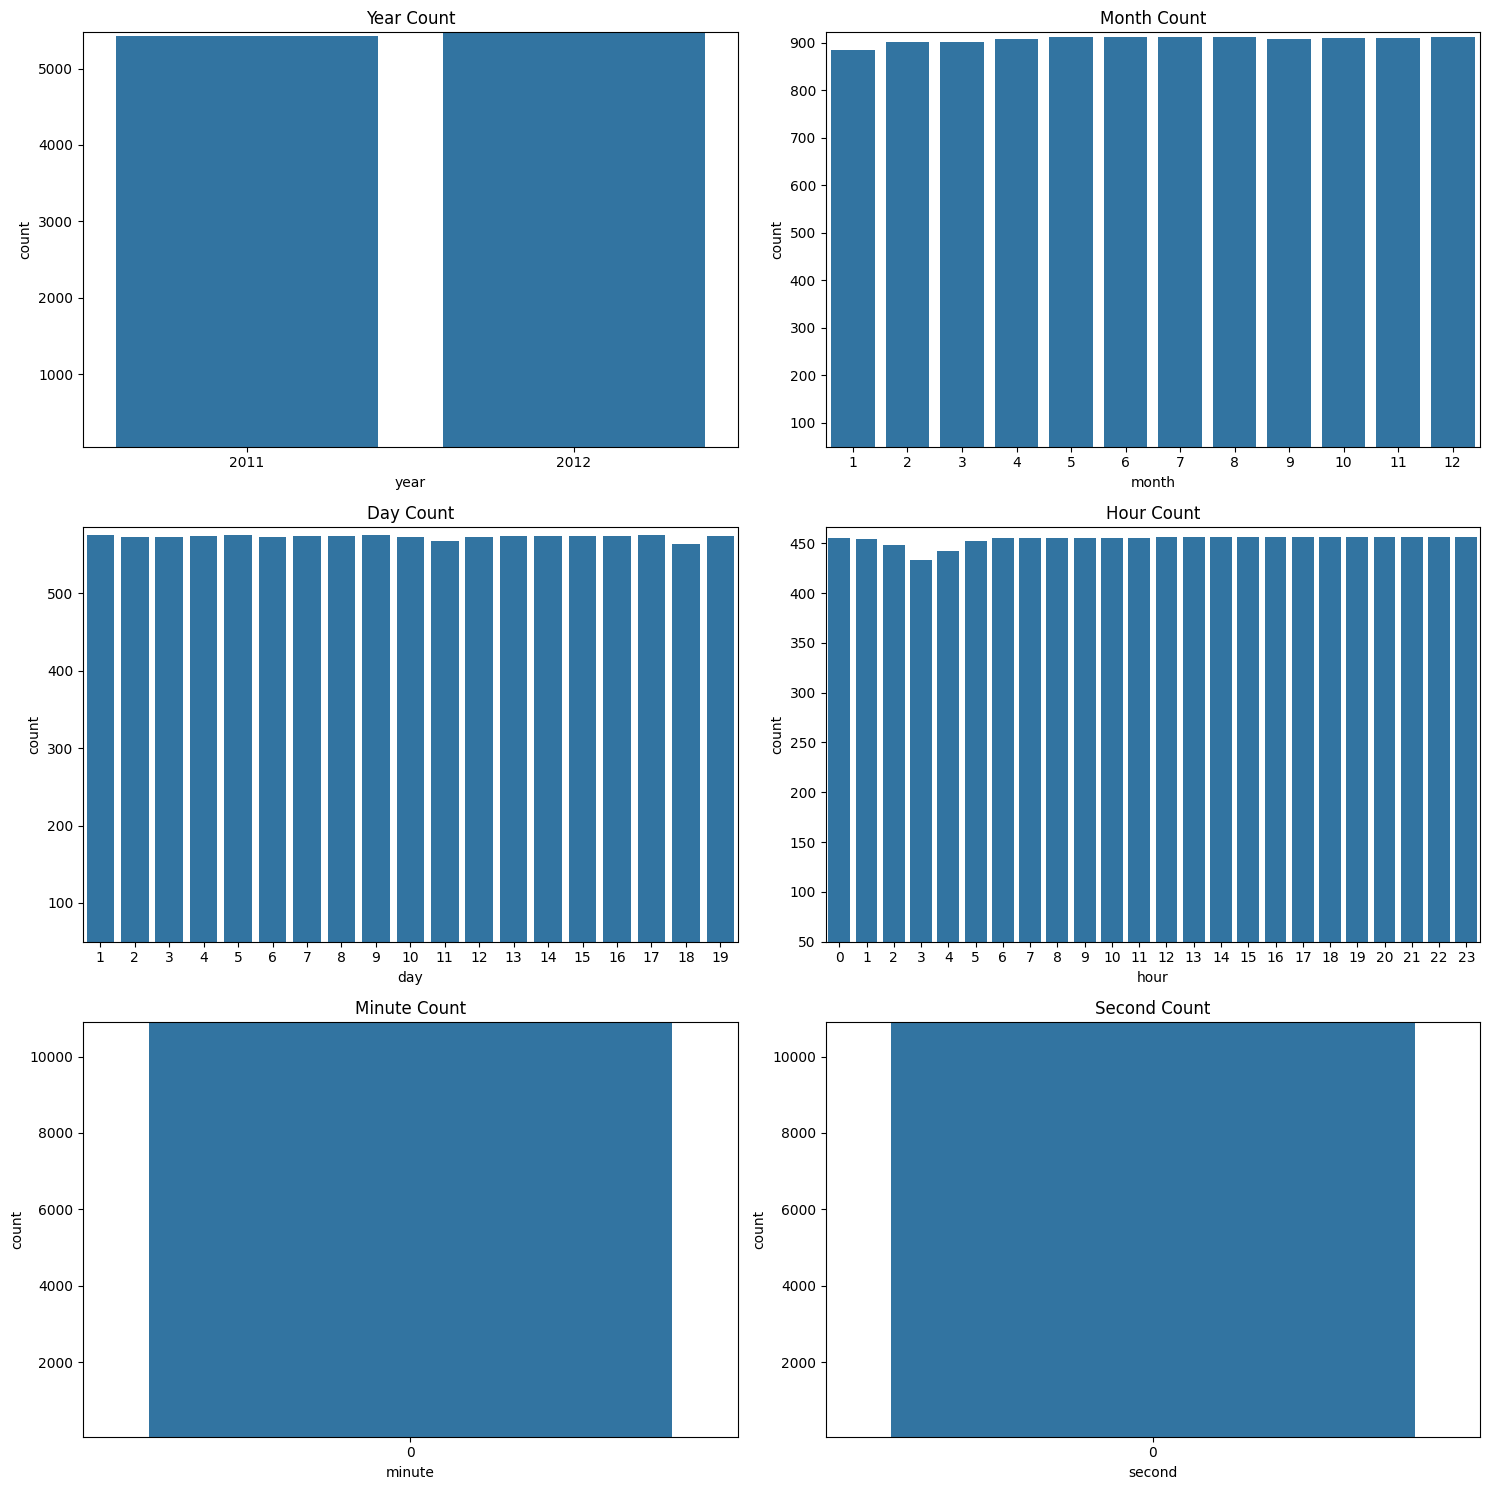

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(15, 15))

min_limit = 50

sns.countplot(x='year', data=train, ax=axs[0, 0])
axs[0, 0].set_title('Year Count')
axs[0, 0].set_ylim(min_limit, train['year'].value_counts().max() + 10)

sns.countplot(x='month', data=train, ax=axs[0, 1])
axs[0, 1].set_title('Month Count')
axs[0, 1].set_ylim(min_limit, train['month'].value_counts().max() + 10)

sns.countplot(x='day', data=train, ax=axs[1, 0])
axs[1, 0].set_title('Day Count')
axs[1, 0].set_ylim(min_limit, train['day'].value_counts().max() + 10)

sns.countplot(x='hour', data=train, ax=axs[1, 1])
axs[1, 1].set_title('Hour Count')
axs[1, 1].set_ylim(min_limit, train['hour'].value_counts().max() + 10)

sns.countplot(x='minute', data=train, ax=axs[2, 0])
axs[2, 0].set_title('Minute Count')
axs[2, 0].set_ylim(min_limit, train['minute'].value_counts().max() + 10)

sns.countplot(x='second', data=train, ax=axs[2, 1])
axs[2, 1].set_title('Second Count')
axs[2, 1].set_ylim(min_limit, train['second'].value_counts().max() + 10)

plt.tight_layout()
plt.show()

In [91]:
# X, y 컬럼 선택
X = train.drop(['datetime', 'count', 'casual', 'registered','year','minute','second'], axis=1)
y = train['count']

In [92]:
X.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,1,1,2


In [93]:
# train/test 데이터 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [94]:
# LinearRegression 모델 학습
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [95]:
# 학습된 모델로 X_test에 대한 예측값 출력
y_pred = model.predict(X_test)

In [96]:
# 손실함수값 계산
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)

23181.140445857734


In [97]:
# rmse 값 계산
import numpy as np
rmse = np.sqrt(mse)
print(rmse)

152.25354001092302


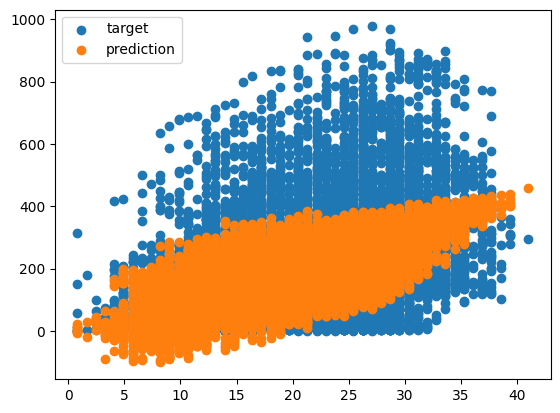

In [98]:
# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
# x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X['temp'], y)
plt.scatter(X['temp'], model.predict(X))
plt.legend(['target', 'prediction'])
plt.show()

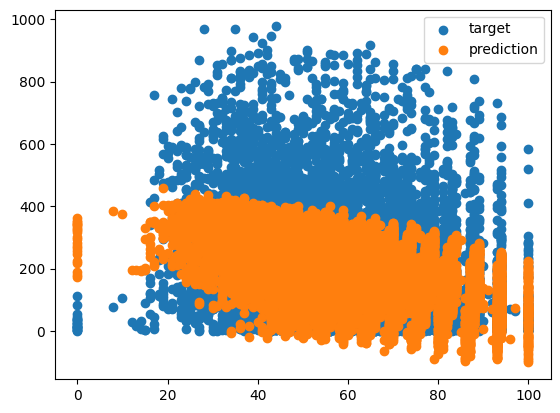

In [99]:
# x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기
plt.scatter(X['humidity'], y)
plt.scatter(X['humidity'], model.predict(X))
plt.legend(['target', 'prediction'])
plt.show()